# Crop Disease Detection: Exploratory Data Analysis (EDA)

**Project Overview**: Precision agriculture app using transfer learning on PlantVillage dataset. This EDA inspects class balance, image quality, and preprocessing needs.

**Author**: SANCHAY MAITY | **Date**: October 15, 2025 | **Version**: 1.0

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for pro visuals (veteran tip: consistent theme)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Paths (update if needed)
DATA_DIR = 'data/plantvillage/plantvillage dataset/color'
CLASSES = sorted([d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))])
print(f"Found {len(CLASSES)} classes: {CLASSES[:5]}...")  # Preview first 5

Found 38 classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']...


In [11]:
# python
# Build counts first, then compute percentage over the total
class_counts = []
for cls in CLASSES:
    cls_path = os.path.join(DATA_DIR, cls)
    count = sum(1 for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg')))
    class_counts.append({'Class': cls, 'Count': count})

df_classes = pd.DataFrame(class_counts)
df_classes['Percentage'] = df_classes['Count'] / df_classes['Count'].sum() * 100

print(df_classes.head())
print(f"Total images: {df_classes['Count'].sum():,}")
print(f"Avg per class: {df_classes['Count'].mean():.0f}")

                      Class  Count  Percentage
0        Apple___Apple_scab    630    1.160114
1         Apple___Black_rot    621    1.143541
2  Apple___Cedar_apple_rust    275    0.506399
3           Apple___healthy   1645    3.029187
4       Blueberry___healthy   1502    2.765859
Total images: 54,305
Avg per class: 1429


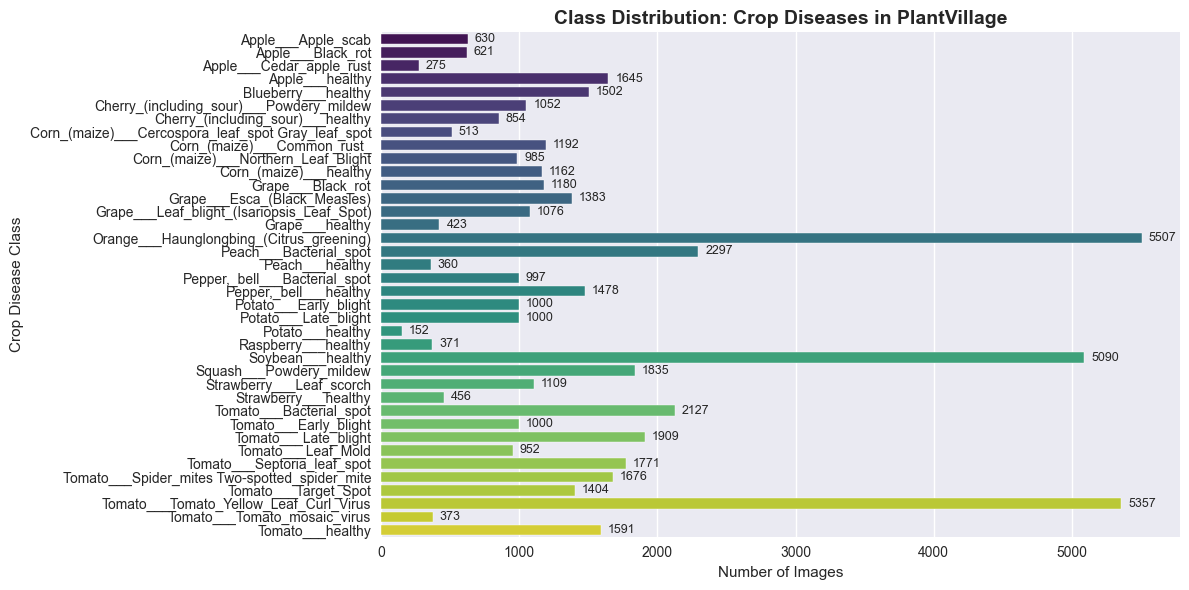

Imbalance ratio (max/min): 36.2 → Will use augmentation in training.


<Figure size 800x550 with 0 Axes>

In [12]:
# Bar plot: Pro-style with labels
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_classes, x='Count', y='Class', ax=ax, palette='viridis')
ax.set_title('Class Distribution: Crop Diseases in PlantVillage', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Images')
ax.set_ylabel('Crop Disease Class')

# Add count labels
for i, v in enumerate(df_classes['Count']):
    ax.text(v + 50, i, str(v), va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Imbalance check
imbalance_ratio = df_classes['Count'].max() / df_classes['Count'].min()
print(f"Imbalance ratio (max/min): {imbalance_ratio:.1f} → Will use augmentation in training.")
plt.savefig('class_dist.png', dpi=300, bbox_inches='tight')

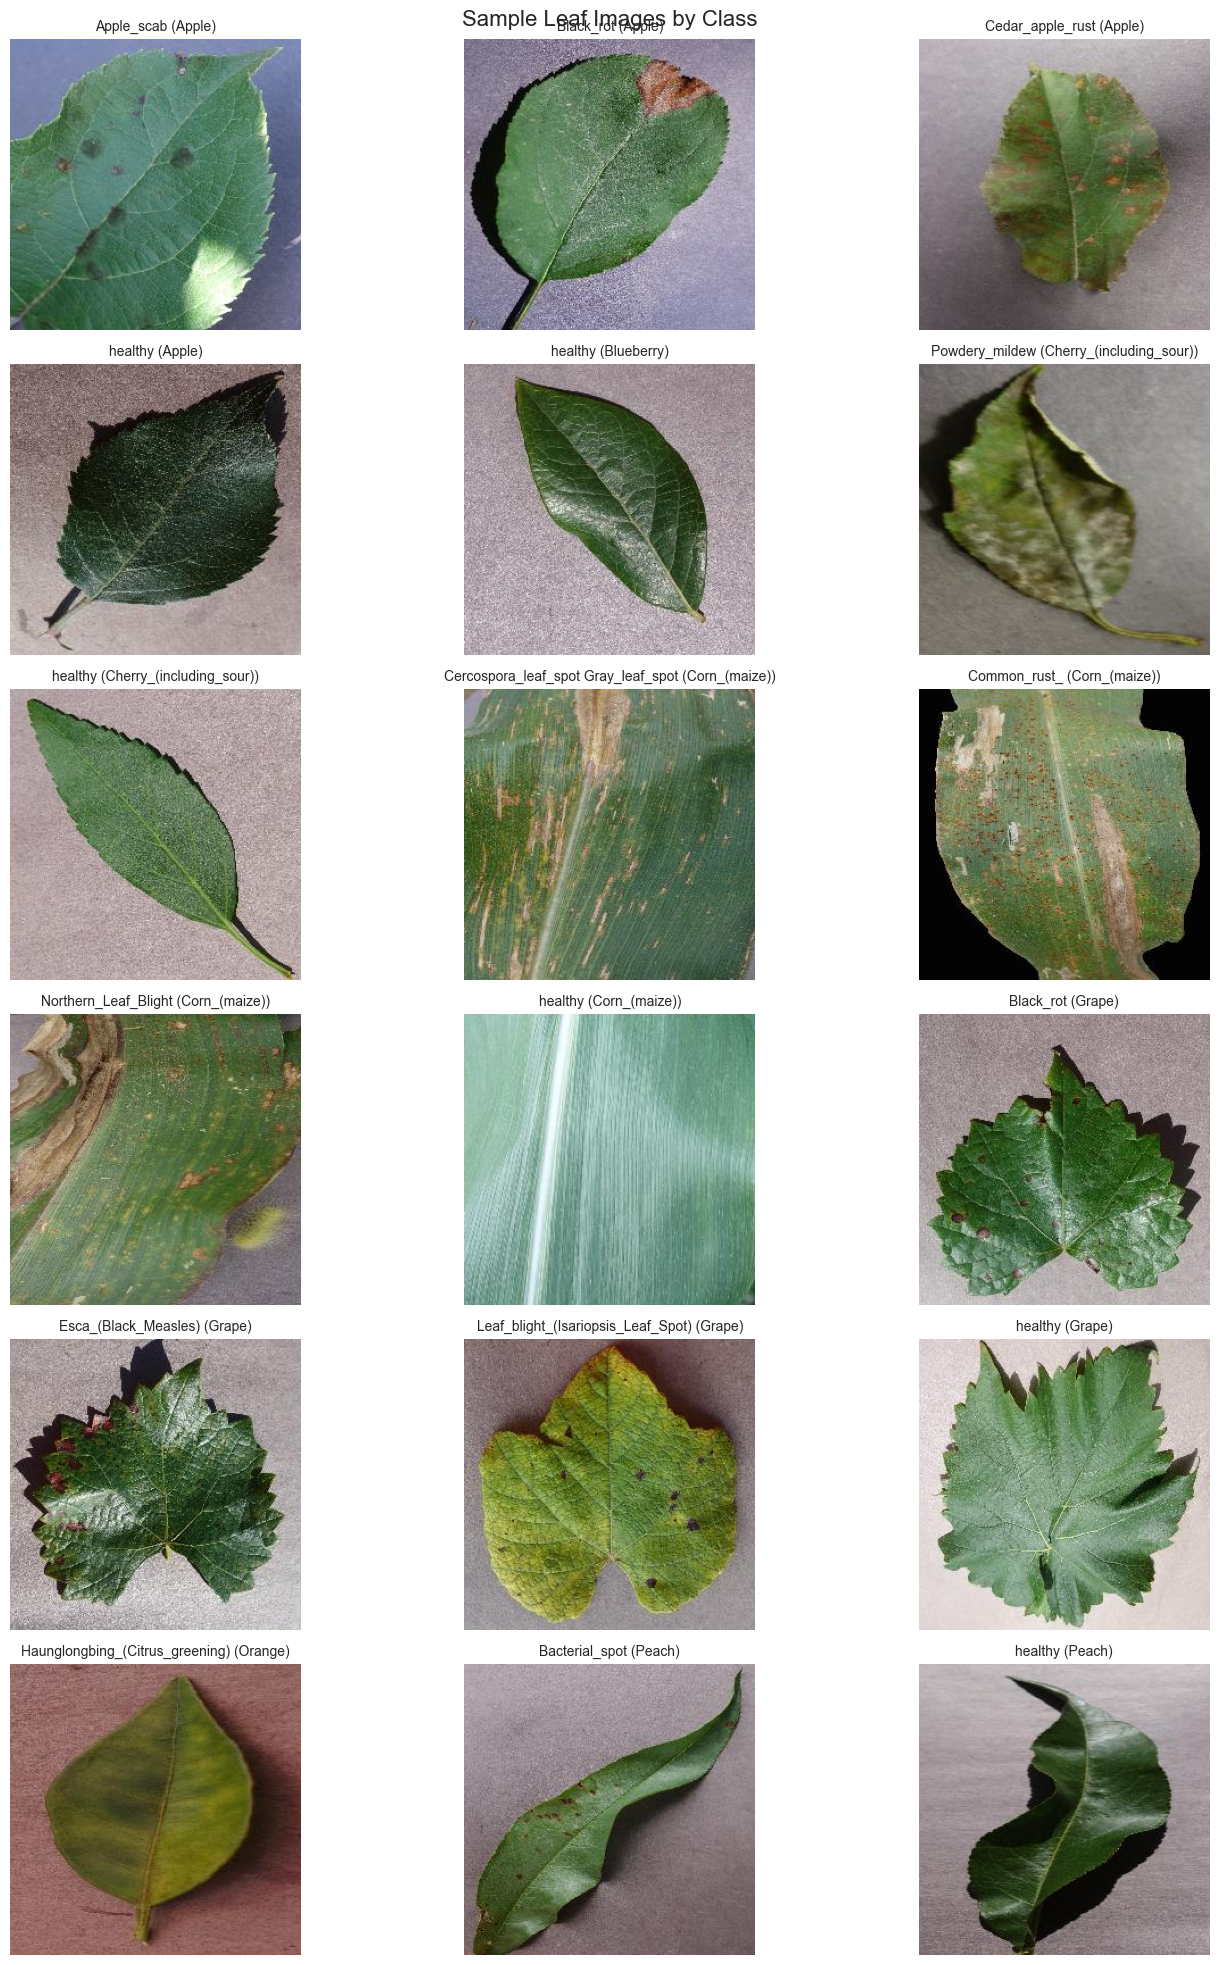

In [13]:
# Sample 3 images per class (grid: 6x3 for preview)
fig, axes = plt.subplots(6, 3, figsize=(15, 20))
axes = axes.ravel()

for idx, cls in enumerate(CLASSES[:18]):  # First 18 classes for demo
    cls_path = os.path.join(DATA_DIR, cls)
    images = [os.path.join(cls_path, f) for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg'))][:3]

    for j, img_path in enumerate(images):
        img = Image.open(img_path)
        axes[idx].imshow(img)
        axes[idx].set_title(f"{cls.split('___')[1]} ({cls.split('___')[0]})", fontsize=10)
        axes[idx].axis('off')

    # Hide empty subplots
    for j in range(len(images), 3):
        axes[idx].axis('off')

plt.suptitle('Sample Leaf Images by Class', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

In [14]:
# Random sample stats (100 images)
sample_paths = []
for cls in CLASSES:
    cls_path = os.path.join(DATA_DIR, cls)
    files = [os.path.join(cls_path, f) for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg'))]
    sample_paths.extend(np.random.choice(files, min(5, len(files)), replace=False))  # 5 per class max

heights, widths, channels = [], [], []
for path in sample_paths[:100]:  # Limit to 100 for speed
    with Image.open(path) as img:
        widths.append(img.width)
        heights.append(img.height)
        channels.append(len(img.getbands()))

print(f"Avg size: {np.mean(widths):.0f}x{np.mean(heights):.0f} | Channels: {np.mean(channels):.0f} (RGB)")
print(f"Size range: {min(widths)}-{max(widths)} x {min(heights)}-{max(heights)}")

Avg size: 256x256 | Channels: 3 (RGB)
Size range: 256-256 x 256-256
